In [136]:
# install libraries
!pip3 install numpy pandas sklearn matplotlib scikit-learn

# **Aula 3 de Labortório de Aprendizado de Máquina**
# Naive bayes, árvores e k-means



## Imports das bibliotecas principais

In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import metrics
from sklearn import tree
from sklearn import feature_selection
from sklearn.tree import export_graphviz
from sklearn import ensemble
from sklearn import linear_model
from sklearn import cluster
import matplotlib.pyplot as plt


## Naive Bayes

#**1) Para a base de dados Haberman (disponibilizada em anexo), faça:**

**a) Divida aleatoriamente a base de dados em duas partes: treino, com 80% das amostras, e teste com as restantes, sendo o atributo alvo a última coluna. Use a parte de treino para estimar um modelo de Naive Bayes e calcule a acurácia
sobre o conjunto de teste. Considere o modelo que usa histograma e distribuição Gaussiana.**

In [138]:
data = pd.read_csv('haberman.data', header = None, names = ['age', 'year of operation', 'number of nodes detected', 'class'])
data.describe()

,age,year of operation,number of nodes detected,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [139]:
#divide os dados
target = data['class']
X = data.copy()
X = X.drop('class', axis=1)
X_train,X_test = train_test_split(X,test_size=0.2, random_state=10)
target_train,target_test = train_test_split(target,test_size=0.2, random_state=10) # o que é o random state?

# dúvidas
  # o que eh o target? É o atributo alvo para ser previsto
  # 

#alpha = 1 --> modelo categórico(considera os valores dos atributos como bins em
#um histograma) com suavização de Laplace
model = naive_bayes.CategoricalNB(alpha=1)
model.fit(X_train,target_train)
target_pred = model.predict(X_test)
print("Acurácia de %d amostras usando categórico: %d%%"
  % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))

#considerando atributos com distribuição Gaussiana
model = naive_bayes.GaussianNB()
model.fit(X_train,target_train)
target_pred = model.predict(X_test)
print("Acurácia de %d amostras usando Gaussiana: %d%%"
  % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))

Acurácia de 62 amostras usando categórico: 75%
Acurácia de 62 amostras usando Gaussiana: 75%


**b) Padronize os valores das variáveis por zscore, ou seja, subtraia a média e divida pelo desvio padrão. Compare
o resultado com o da letra a) para distribuição Gaussiana. O que você observou?**

In [140]:
data = pd.read_csv('haberman.data', header = None, names = ['age', 'year of operation', 'number of nodes detected', 'class'])

target = data['class']
X = data.copy()
X = X.drop('class', axis=1)

X_train,X_test = train_test_split(X,test_size=0.2, random_state=10)
target_train,target_test = train_test_split(target,test_size=0.2, random_state=10)

#Z-score
mean = X_train.mean()
std = X_train.std()

X_train_Z = (X_train - mean)/std
X_test_Z = (X_test - mean)/std

#considerando atributos com distribuição Gaussiana
model = naive_bayes.GaussianNB()
model.fit(X_train_Z,target_train)
target_pred = model.predict(X_test_Z)
print("Acurácia de %d amostras usando Gaussiana: %d%%"
  % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))

# #Mudança de escala dos atributos 0 e 1
# X.iloc[:,0] = 10*X.iloc[:,0] + 10
# X.iloc[:,1] = 500*X.iloc[:,1] + 500
# X_train,X_test = train_test_split(X,test_size=0.2, random_state=10)
# target_train,target_test = train_test_split(target,test_size=0.2, random_state=10)

# model = naive_bayes.GaussianNB()
# model.fit(X_train,target_train)
# target_pred = model.predict(X_test)
# print("Acurácia de %d amostras usando Gaussiana: %d%%"
#   % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))


Acurácia de 62 amostras usando Gaussiana: 75%


**c) Adicione duas variáveis aleatórias às variáveis de entrada do modelo, tal que elas tenham distribuição Gaussiana, com
médias e desvios padrões diferentes entre elas. Compare o resultado com o da letra a) para distribuição Gaussiana. O que você
observou?**

In [141]:
data = pd.read_csv('haberman.data', header = None, names = ['age', 'year of operation', 'number of nodes detected', 'class'])

target = data['class']
X = data.copy()
X = X.drop('class', axis=1)
X['aleatorio_1'] = np.random.normal(size=X.shape[0])
X['aleatorio_2'] = 10*np.random.normal(size=X.shape[0]) + 100

X_train,X_test = train_test_split(X,test_size=0.2, random_state=10)
target_train,target_test = train_test_split(target,test_size=0.2, random_state=10)

#considerando atributos com distribuição Gaussiana
model = naive_bayes.GaussianNB()
model.fit(X_train,target_train)
target_pred = model.predict(X_test)
print("Acurácia de %d amostras usando Gaussiana: %d%%"
  % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))

X.describe()

Acurácia de 62 amostras usando Gaussiana: 75%


,age,year of operation,number of nodes detected,aleatorio_1,aleatorio_2
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.000658,99.839158
std,10.803452,3.249405,7.189654,0.954122,10.334365
min,30.000000,58.000000,0.000000,-2.989081,70.503825
25%,44.000000,60.000000,0.000000,-0.589741,92.365402
50%,52.000000,63.000000,1.000000,0.068295,100.255088
75%,60.750000,65.750000,4.000000,0.596456,106.309123
max,83.000000,69.000000,52.000000,2.691403,127.541777


**d) Verifique o efeito de alterar as probabilidades a priori de cada classe.**

In [142]:
data = pd.read_csv('haberman.data', header = None, names = ['age', 'year of operation', 'number of nodes detected', 'class'])

target = data['class']
X = data.copy()
X = X.drop('class', axis=1)

X_train,X_test = train_test_split(X,test_size=0.2, random_state=10)
target_train,target_test = train_test_split(target,test_size=0.2, random_state=10)

#considerando atributos com distribuição Gaussiana
model = naive_bayes.GaussianNB(priors=[1/3,2/3])
model.fit(X_train,target_train)
target_pred = model.predict(X_test)
print("Acurácia de %d amostras usando Gaussiana: %d%%"
  % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))

Acurácia de 62 amostras usando Gaussiana: 43%


## Árvores

# **2) Para a base de dados Balance (disponibilizada em anexo), faça:**

**a) Divida aleatoriamente a base de dados em duas partes: treino, com 80% das amostras, e teste com as restantes, sendo o atributo alvo a primeira coluna. Use a parte de treino para estimar um modelo de árvore de decisão e calcule a acurácia
sobre o conjunto de teste. Visualize a árvore.**

In [143]:
data = pd.read_csv('balance-scale.data', header = None, names = ['class','Left-Weight', ' Left-Distance', 'Right-Weight', 'Right-Distance'])

#divide os dados
target = data['class']
X = data.copy()
X = X.drop('class', axis=1)
X_train,X_test = train_test_split(X,test_size=0.2, random_state=0)
target_train,target_test = train_test_split(target,test_size=0.2, random_state=0)

model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train,target_train)
target_pred = model.predict(X_test)

print("Acurácia de %d amostras usando árvore: %d%%"
  % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))


Acurácia de 125 amostras usando árvore: 72%


O que acontece se irmos mudando a profundidade?

In [144]:
# for profundidade in range(1,4):
#     model = tree.DecisionTreeClassifier(max_depth = profundidade)
#     model.fit(X_train,target_train)
#     target_pred = model.predict(X_test)

#     print("Acurácia de %d amostras usando árvore com profundidade %d: %d%%"
#     % (X_test.shape[0], profundidade, 100*(target_test == target_pred).sum()/X_test.shape[0]))


voltando ao lab normal agora

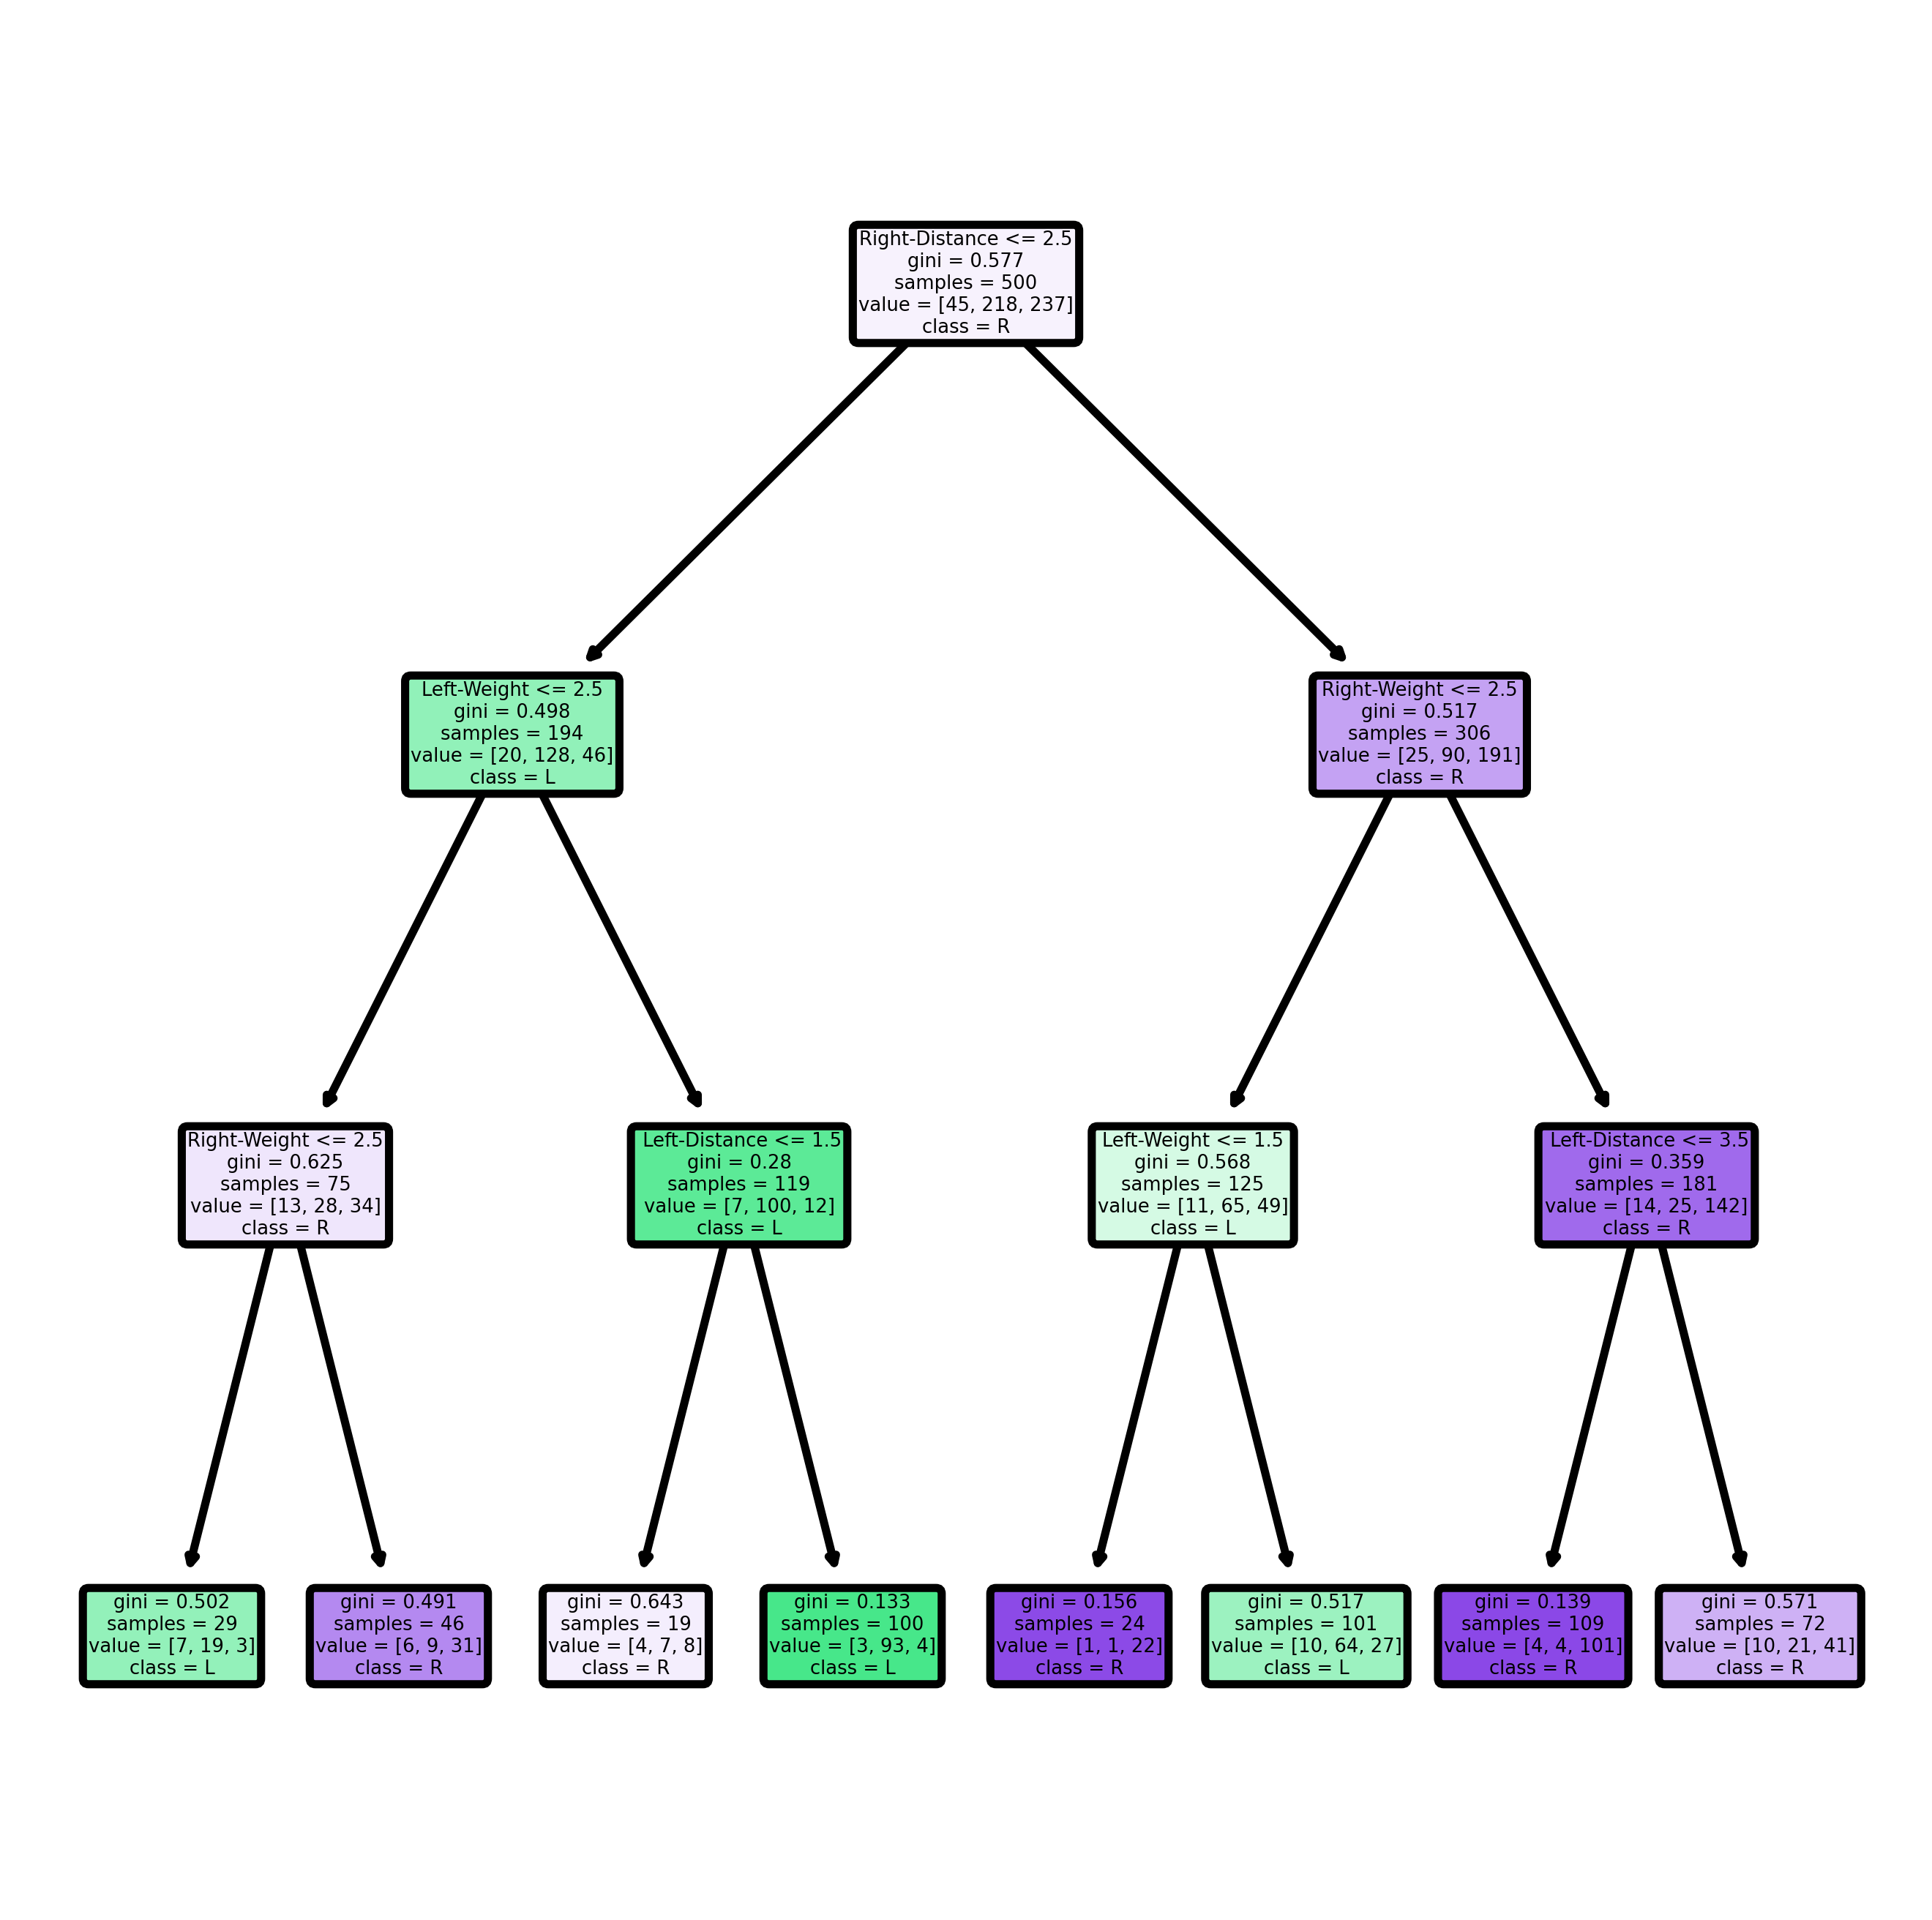

In [145]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(model,
               feature_names = ['Left-Weight', ' Left-Distance', 'Right-Weight', 'Right-Distance'],
               class_names = np.unique(target_train),
               rounded=True,
               precision = 3,
               filled = True);
fig.savefig('tree.png')

plt.plot('tree.png')

**b) Utilize Random Forest para calcular a acurácia sobre os mesmos dados e compare com o resultado anterior.**

In [146]:
data = pd.read_csv('balance-scale.data', header = None, names = ['class','Left-Weight', ' Left-Distance', 'Right-Weight', 'Right-Distance'])

#divide os dados
target = data['class']
X = data.copy()
X = X.drop('class', axis=1)
X_train,X_test = train_test_split(X,test_size=0.2, random_state=0)
target_train,target_test = train_test_split(target,test_size=0.2, random_state=0)

model = ensemble.RandomForestClassifier(max_depth=4, random_state=0, n_estimators=44)
model.fit(X_train,target_train)
target_pred = model.predict(X_test)

print("Acurácia de %d amostras usando Random Forest: %d%%"
  % (X_test.shape[0], 100*(target_test == target_pred).sum()/X_test.shape[0]))

Acurácia de 125 amostras usando Random Forest: 92%


#**3 Avalie o SHAP values dos modelos para a base de dados California Housing**

In [147]:
!pip install shap
import shap

**a) Divida os dados em 80% para treinar e 20% para testar um modelo de regressão linear**

In [148]:
X,y = shap.datasets.california(display=True)
X_train,X_test = train_test_split(X,test_size=0.2, random_state=0)
y_train,y_test = train_test_split(y, test_size=0.2, random_state=0)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
target_pred = model.predict(X_test)
print(f"RMSE do modelo de regressão linear: {metrics.mean_squared_error(y_test,target_pred)}")
#model_param = list(model.coef_)
#model_param.append(model.intercept_)
#print(f'Parametros do modelo {model_param}')

RMSE do modelo de regressão linear: 0.528984167036722


Valor médio do modelo de regressão linear: 2.0506013083319985


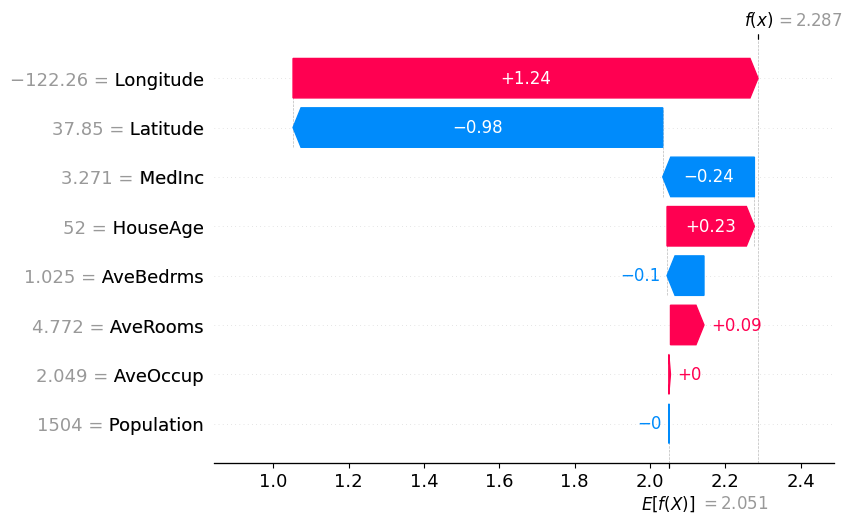

In [149]:
X_shap = shap.utils.sample(X_train) #realiza uma amostragem aleatório do conjunto de dados
print(f'Valor médio do modelo de regressão linear: {model.coef_ @ X_shap.mean() + model.intercept_}')
explainer = shap.Explainer(model.predict,X_shap)
shap_values = explainer(X_shap)
#Shap value para a amostra 0
shap.plots.waterfall(shap_values[0])

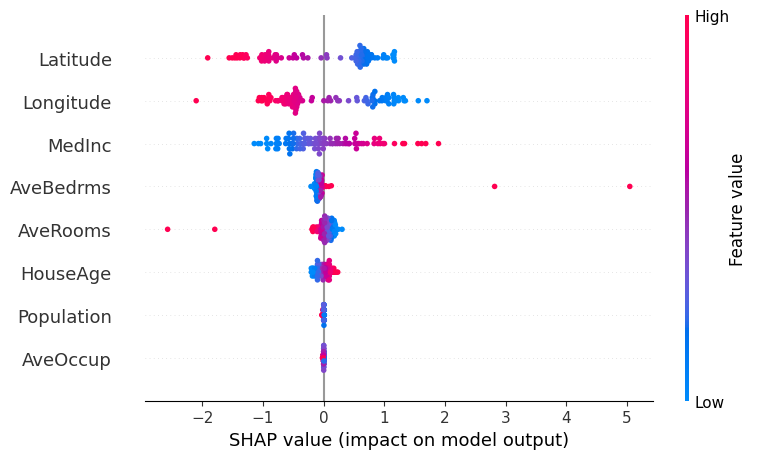

In [150]:
shap.summary_plot(shap_values, X_shap)

**b) Divida os dados em 80% para treino e treine um modelo de Random Forest**

In [151]:
import warnings
warnings.filterwarnings("ignore")

X,y = shap.datasets.california(display=True)
X_train,X_test = train_test_split(X,test_size=0.2, random_state=0)
y_train,y_test = train_test_split(y, test_size=0.2, random_state=0)

model = ensemble.RandomForestRegressor(max_depth=5, random_state=0, n_estimators=5)
model.fit(X_train,y_train)
target_pred = model.predict(X_test)
print(f"RMSE do Random Forest: {metrics.mean_squared_error(y_test,target_pred)}")


RMSE do Random Forest: 0.48652912836922413


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:16<00:00,  5.99it/s]


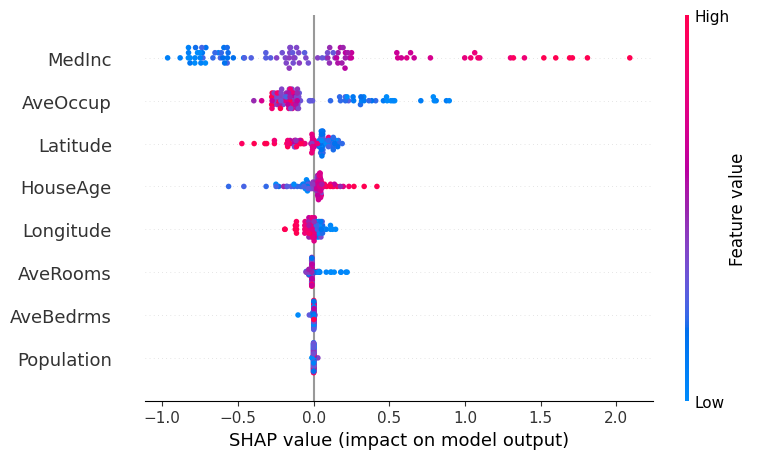

In [152]:
model_shap_values = shap.KernelExplainer(model.predict,X_shap)
shap_values = model_shap_values.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap)

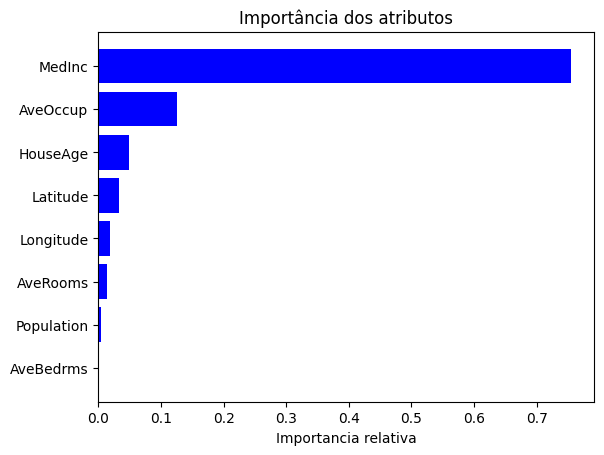

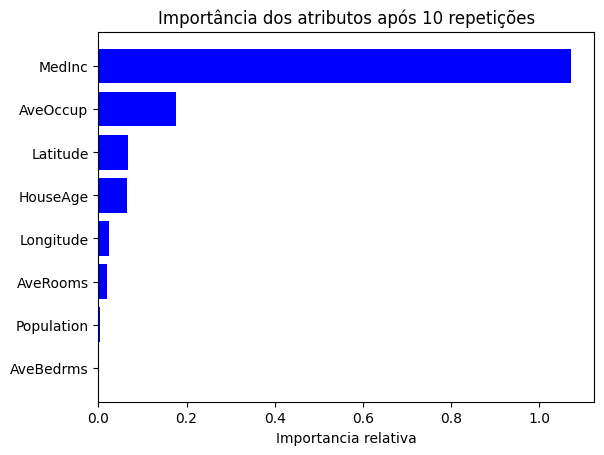

In [153]:
#Seleção de atributos na floresta
importances = model.feature_importances_
indices = np.argsort(importances)
features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
plt.title('Importância dos atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()


#avaliando diferentes permutações dos atributos
from sklearn.inspection import permutation_importance
result = permutation_importance(
    model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

indices = np.argsort(result['importances_mean'])
plt.title('Importância dos atributos após 10 repetições')
plt.barh(range(len(indices)), result['importances_mean'][indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

In [154]:
#Treinando somente com os atributos selecionados MedInc, AveOccup, Latitude, HouseAge
X_new = X.copy()

X_new = X_new.drop(['AveRooms','AveBedrms','Population','Longitude'],axis = 1)

X_train,X_test = train_test_split(X_new,test_size=0.2, random_state=0)
y_train,y_test = train_test_split(y, test_size=0.2, random_state=0)

model = ensemble.RandomForestRegressor(max_depth=5, random_state=0, n_estimators=5)
model.fit(X_train,y_train)
target_pred = model.predict(X_test)
print(f"RMSE do Random Forest considerando só os atributos relevantes: {metrics.mean_squared_error(y_test,target_pred)}")

RMSE do Random Forest considerando só os atributos relevantes: 0.5061228887423941


## K-means

# **4) Realize o agrupamento de dados utilizando o k-means.**

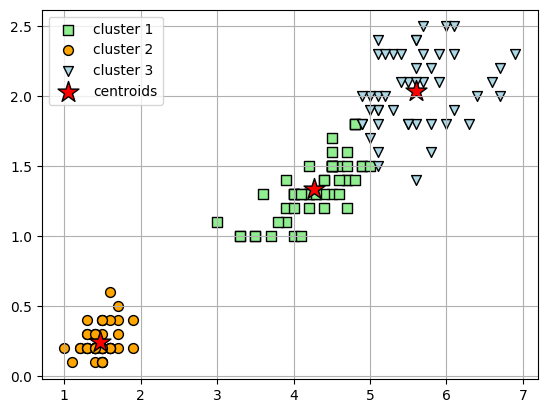

In [162]:
data = pd.read_csv('iris.data', header = None, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

#considera só dois atributos para visualização
data = data.drop(['class', 'sepal length', 'sepal width'], axis=1)

model = cluster.KMeans(n_clusters = 3, n_init = 10, max_iter = 100, random_state=0)
output = model.fit_predict(data)

# plot the 3 clusters
plt.scatter(
    data.iloc[output == 0, 0], data.iloc[output == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    data.iloc[output == 1, 0], data.iloc[output == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    data.iloc[output == 2, 0], data.iloc[output == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#print(output)

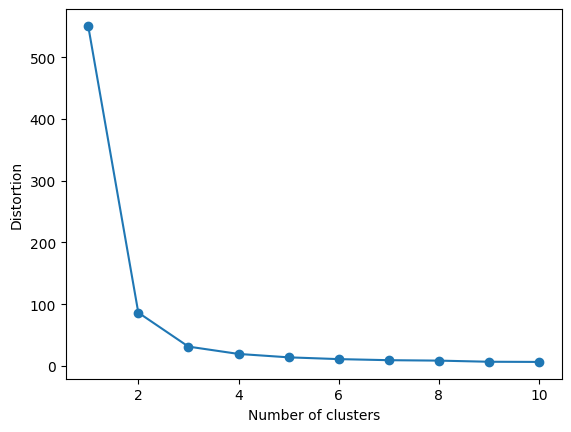

É escolhido k = 3, pois para k > 3 a redução da função de custo é pequena


In [156]:
#identificando o melhor valor de k
distortions = []
for i in range(1, 11):
    model = cluster.KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=100,
        tol=1e-04, random_state=0
    )
    model.fit(data)
    distortions.append(model.inertia_) #Sum of Squares Errors --> cost function J

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
print('É escolhido k = 3, pois para k > 3 a redução da função de custo é pequena')